### 데이터 전처리

In [80]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Input,BatchNormalization,Dropout, Conv2D, MaxPooling2D

df = pd.read_csv('./train.csv')

df_scaled = df
scale_cols = df_scaled[df_scaled.columns.difference(['leaktype'])].columns

In [64]:
#정규화 MinMaxScaler

scaler = MinMaxScaler()

In [81]:
#표준화 StandardScaler

scaler = StandardScaler()

In [82]:
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled, columns=scale_cols)

df_scaled['leaktype'] = df['leaktype'].values 

feature_df = df_scaled[df_scaled.columns.difference(['leaktype'])]
label_df = df_scaled['leaktype']

label_df = label_df.replace('other', 0)
label_df = label_df.replace('noise', 1)
label_df = label_df.replace('normal', 2)
label_df = label_df.replace('in', 3)
label_df = label_df.replace('out', 4)

feature_np = feature_df.to_numpy().astype('float32')
label_np = label_df.to_numpy().astype('float32')

In [83]:
s = np.arange(len(feature_np))

np.random.shuffle(s)

feature_np = feature_np[s]
label_np = label_np[s]

split = 0.2

test_num = int(split*len(label_np))

x_test = feature_np[0:test_num]
y_test = label_np[0:test_num]

x_train = feature_np[test_num:]
y_train = label_np[test_num:]

#ont-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)

### 차원이 안 맞는 문제를 해결하기 위해 one hot encoding 사용
### output layer shape : [,5] loss : categorical_crossentropy

In [4]:
model = Sequential()

model.add(Dense(128, activation='sigmoid', input_shape=(x_train.shape[-1],)))
model.add(Dense(5, activation='softmax')) 
#output layer number of class = 5

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

In [5]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=300, validation_data = (x_test, y_test))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

2022-07-07 11:13:09.735895: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
 53/893 [>.............................] - ETA: 2s - loss: 1.6201 - accuracy: 0.1356 - f1_score: 0.0944 

2022-07-07 11:13:10.839650: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


893/893 [==============================] - 4s 4ms/step - loss: 1.2230 - accuracy: 0.5343 - f1_score: 0.2006 - val_loss: 1.1234 - val_accuracy: 0.5821 - val_f1_score: 0.2120
Epoch 2/300
893/893 [==============================] - 3s 4ms/step - loss: 1.0849 - accuracy: 0.5997 - f1_score: 0.2466 - val_loss: 1.0541 - val_accuracy: 0.6183 - val_f1_score: 0.2703
Epoch 3/300
893/893 [==============================] - 3s 4ms/step - loss: 1.0295 - accuracy: 0.6249 - f1_score: 0.2851 - val_loss: 1.0090 - val_accuracy: 0.6427 - val_f1_score: 0.3113
Epoch 4/300
893/893 [==============================] - 3s 4ms/step - loss: 0.9905 - accuracy: 0.6423 - f1_score: 0.3102 - val_loss: 0.9751 - val_accuracy: 0.6546 - val_f1_score: 0.3272
Epoch 5/300
893/893 [==============================] - 3s 4ms/step - loss: 0.9604 - accuracy: 0.6523 - f1_score: 0.3231 - val_loss: 0.9485 - val_accuracy: 0.6599 - val_f1_score: 0.3350
Epoch 6/300
893/893 [==============================] - 3s 3ms/step - loss: 0.9362 - acc

KeyboardInterrupt: 

### f1 score가 0.5를 넘기지 못하고 loss 또한 0.6에서 줄어들지 않음 또한 train loss보다 validation loss가 더 높음

### 학습률 감소, 은닉층 추가

In [8]:
model = Sequential()

model.add(Dense(128, activation='sigmoid', input_shape=(x_train.shape[-1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax')) 

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

In [9]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=300, validation_data = (x_test, y_test))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/300
893/893 [==============================] - 3s 3ms/step - loss: 0.9625 - accuracy: 0.6419 - f1_score: 0.3132 - val_loss: 0.8319 - val_accuracy: 0.6917 - val_f1_score: 0.3431
Epoch 2/300
893/893 [==============================] - 3s 3ms/step - loss: 0.7872 - accuracy: 0.7016 - f1_score: 0.3795 - val_loss: 0.7589 - val_accuracy: 0.7159 - val_f1_score: 0.4185
Epoch 3/300
893/893 [==============================] - 3s 3ms/step - loss: 0.7339 - accuracy: 0.7199 - f1_score: 0.4112 - val_loss: 0.7222 - val_accuracy: 0.7258 - val_f1_score: 0.3979
Epoch 4/300
893/893 [==============================] - 3s 3ms/step - loss: 0.6991 - accuracy: 0.7349 - f1_score: 0.4400 - val_loss: 0.6977 - val_accuracy: 0.7464 - val_f1_score: 0.4727
Epoch 5/300
893/893 [==============================] - 3s 3ms/step - loss: 0.6723 - accuracy: 0.7463 - f1_score: 0.4599 - val_loss: 0.6748 - val_accuracy: 0.7452 - val_f1_score: 0.4498
Epoch 6/300
893/893 [==============================] - 3s 3ms/step - loss: 

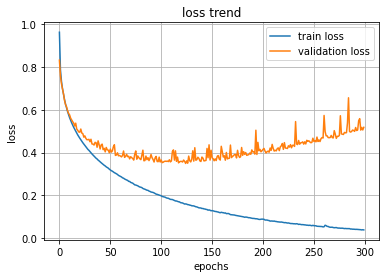

In [10]:
import matplotlib.pyplot as plt

plt.title('loss trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

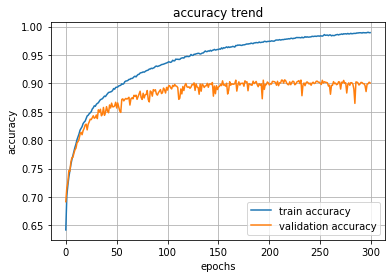

In [11]:
plt.title('accuracy trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

### validation loss가 0에 수렴하지 않는 것으로 보아 overfitting 

### dropout층 추가, batch normalization

In [23]:
model = Sequential()

model.add(Dense(128, activation='sigmoid', input_shape=(x_train.shape[-1],)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax')) 

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

In [24]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=300, validation_data = (x_test, y_test))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/300
893/893 [==============================] - 5s 6ms/step - loss: 1.1346 - accuracy: 0.5892 - f1_score: 0.3314 - val_loss: 0.8421 - val_accuracy: 0.6825 - val_f1_score: 0.3676
Epoch 2/300
893/893 [==============================] - 5s 5ms/step - loss: 0.9114 - accuracy: 0.6644 - f1_score: 0.3624 - val_loss: 0.7945 - val_accuracy: 0.7040 - val_f1_score: 0.3678
Epoch 3/300
893/893 [==============================] - 5s 6ms/step - loss: 0.8659 - accuracy: 0.6778 - f1_score: 0.3641 - val_loss: 0.7675 - val_accuracy: 0.7125 - val_f1_score: 0.3833
Epoch 4/300
893/893 [==============================] - 5s 5ms/step - loss: 0.8393 - accuracy: 0.6859 - f1_score: 0.3704 - val_loss: 0.7508 - val_accuracy: 0.7161 - val_f1_score: 0.3887
Epoch 5/300
893/893 [==============================] - 5s 6ms/step - loss: 0.8175 - accuracy: 0.6961 - f1_score: 0.3822 - val_loss: 0.7269 - val_accuracy: 0.7236 - val_f1_score: 0.3910
Epoch 6/300
893/893 [==============================] - 5s 5ms/step - loss: 

KeyboardInterrupt: 

### validation loss가 train loss보다 작은 값이지만 epoch이 증가되도 학습이 더이상 진행되지 않음

### 활성화 함수 sigmoid보다 relu와 elu가 성능이 좋아 변경
### 학습이 반복되어도 정답을 찾지 못한다는 이유가 유의미한 노드의 연결을 끊은 것으로 해석, dropout 축소
### 경사하강법보다 Adam이 더 효율적으로 정답에 접근, optimizer 변경

In [27]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(x_train.shape[-1],)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='elu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax')) 

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

In [28]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=300, validation_data = (x_test, y_test))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/300
893/893 [==============================] - 6s 6ms/step - loss: 0.7642 - accuracy: 0.7171 - f1_score: 0.4276 - val_loss: 0.6196 - val_accuracy: 0.7730 - val_f1_score: 0.4808
Epoch 2/300
893/893 [==============================] - 5s 6ms/step - loss: 0.6429 - accuracy: 0.7610 - f1_score: 0.4782 - val_loss: 0.6033 - val_accuracy: 0.7837 - val_f1_score: 0.5425
Epoch 3/300
893/893 [==============================] - 5s 6ms/step - loss: 0.6017 - accuracy: 0.7780 - f1_score: 0.5238 - val_loss: 0.5617 - val_accuracy: 0.7899 - val_f1_score: 0.4928
Epoch 4/300
893/893 [==============================] - 5s 6ms/step - loss: 0.5748 - accuracy: 0.7888 - f1_score: 0.5380 - val_loss: 0.5561 - val_accuracy: 0.7859 - val_f1_score: 0.5426
Epoch 5/300
893/893 [==============================] - 5s 6ms/step - loss: 0.5560 - accuracy: 0.7986 - f1_score: 0.5622 - val_loss: 0.5328 - val_accuracy: 0.8073 - val_f1_score: 0.5728
Epoch 6/300
893/893 [==============================] - 5s 6ms/step - loss: 

In [33]:
model.evaluate(x_test, y_test)

158/158 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8978 - f1_score: 0.7926


[0.42508137226104736, 0.8978174328804016, 0.7926432490348816]

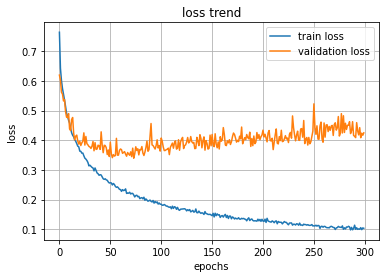

In [29]:
import matplotlib.pyplot as plt

plt.title('loss trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

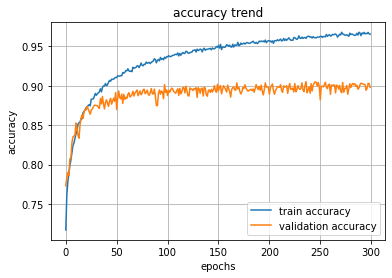

In [30]:
plt.title('accuracy trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

### train data에 대해서는 적절하게 학습이 진행되지만 validation data에 대해서 계속 overfitting 발생

### 모델이 복잡해서 과적합이 발생할 수도 있음, 노드의 개수를 줄이고 epoch도 줄여서 학습 모델을 간략화

In [37]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(x_train.shape[-1],)))
model.add(Dropout(0.25))
model.add(Dense(32, activation='elu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax')) 

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

In [39]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=200, validation_data = (x_test, y_test))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/200
735/735 [==============================] - 3s 4ms/step - loss: 0.6323 - accuracy: 0.7649 - f1_score: 0.4918 - val_loss: 0.5865 - val_accuracy: 0.7815 - val_f1_score: 0.5037
Epoch 2/200
735/735 [==============================] - 3s 4ms/step - loss: 0.6075 - accuracy: 0.7756 - f1_score: 0.5088 - val_loss: 0.5522 - val_accuracy: 0.7937 - val_f1_score: 0.5074
Epoch 3/200
735/735 [==============================] - 3s 4ms/step - loss: 0.5899 - accuracy: 0.7838 - f1_score: 0.5274 - val_loss: 0.5583 - val_accuracy: 0.8043 - val_f1_score: 0.5152
Epoch 4/200
735/735 [==============================] - 3s 4ms/step - loss: 0.5758 - accuracy: 0.7898 - f1_score: 0.5427 - val_loss: 0.5223 - val_accuracy: 0.8068 - val_f1_score: 0.5463
Epoch 5/200
735/735 [==============================] - 3s 5ms/step - loss: 0.5542 - accuracy: 0.8003 - f1_score: 0.5595 - val_loss: 0.5333 - val_accuracy: 0.8068 - val_f1_score: 0.5305
Epoch 6/200
735/735 [==============================] - 3s 5ms/step - loss: 

In [40]:
model.evaluate(x_test, y_test)

315/315 [==============================] - 1s 3ms/step - loss: 0.4514 - accuracy: 0.8748 - f1_score: 0.7320


[0.4514477849006653, 0.8748015761375427, 0.7319678664207458]

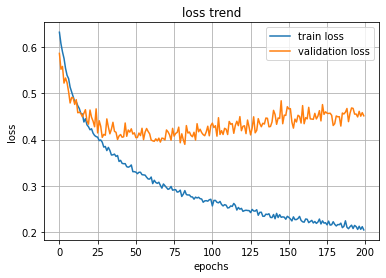

In [41]:
import matplotlib.pyplot as plt

plt.title('loss trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

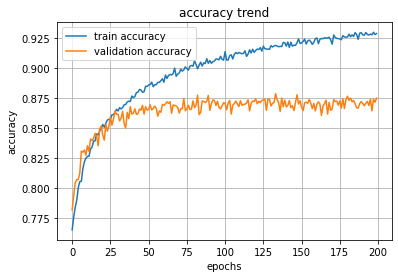

In [42]:
plt.title('accuracy trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

### 다섯번의 학습을 진행한 최종 결과 : overfitting이 계속해서 발생 중
### train data의 f1 score은 0.92 정도까지 측정
### 최종 f1 score은 0.79까지 측정됨
### epoch을 크게 갖고 가면 갈수록 train data에 대해서는 0으로 수렴함

### 해결해야 하는 문제는 과적합
### 오차 역전파는 학습을 진행할 때 미분 계산 시간을 빠르게 해주는 방법이므로 상관없는 개념
### Convolution layer을 사용해 모델을 경량화할 필요성이 있음